# Data: Loading, Cleaning, and Preprocessing

Davis and KIBA datasets, see: https://tdcommons.ai/multi_pred_tasks/dti#davis

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import Descriptors
from tdc.multi_pred import DTI
from typing import Literal

# Load the datasets
download_davis = DTI(name='DAVIS')
df_davis = download_davis.get_data()
download_kiba = DTI(name='KIBA')
df_kiba = download_kiba.get_data()

# Filters
max_drug_atoms = 60
max_target_length = 2000
min_occurrences = 10

def explore_dti_data(name: Literal['DAVIS', 'KIBA'], filter=True) -> pd.DataFrame:
    """
    Performs data exploration and visualization on a drug-target interaction (DTI) dataset.
    
    Parameters:
    df (pandas.DataFrame): A DataFrame containing the following columns:
        - Drug_ID: Integer ID for the drug
        - Drug: SMILES string representing the drug
        - Target_ID: String ID for the target
        - Target: Amino acid sequence of the target
        - Y: Binding affinity between the drug and target
    """
    # Load the dataset
    df = df_davis if name == 'DAVIS' else df_kiba
    print(f"Dataset shape: {df.shape}", name)

    # Explore drug properties
    print("\nDrug properties:", name)

    # Get unique drugs
    unique_drugs = df['Drug'].unique()
    # Calculate molecular weight, logP, and heavy atom count for unique drugs
    unique_MW = {drug: Descriptors.MolWt(Chem.MolFromSmiles(drug)) for drug in unique_drugs}
    unique_LogP = {drug: Descriptors.MolLogP(Chem.MolFromSmiles(drug)) for drug in unique_drugs}
    unique_HeavyAtoms = {drug: Descriptors.HeavyAtomCount(Chem.MolFromSmiles(drug)) for drug in unique_drugs}
    # Map the calculated values back to the original dataframe
    df['MW'] = df['Drug'].map(unique_MW)
    df['LogP'] = df['Drug'].map(unique_LogP)
    df['HeavyAtoms'] = df['Drug'].map(unique_HeavyAtoms)
    # Filter out drugs with too many atoms
    if filter:
        df = df[df['HeavyAtoms'] <= max_drug_atoms]
    # Display distributions
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    sns.histplot(df['MW'], ax=axes[0])
    axes[0].set_title('Molecular Weight Distribution')
    axes[0].set_xlabel('Molecular Weight')
    sns.histplot(df['LogP'], ax=axes[1])
    axes[1].set_title('LogP Distribution')
    axes[1].set_xlabel('LogP')
    sns.histplot(df['HeavyAtoms'], ax=axes[2])
    axes[2].set_title('Heavy Atom Count Distribution')
    axes[2].set_xlabel('Heavy Atom Count')
    plt.tight_layout()
    plt.show()
    
    # Explore target properties
    print("\nTarget properties:", name)
    
    # Calculate length of amino acid sequences
    df['TargetLength'] = df['Target'].apply(len)
    # Filter out targets with too few occurrences
    if filter:
        df = df[df['TargetLength'] <= max_target_length]
    # Display distribution of target lengths
    fig, ax = plt.subplots(figsize=(7, 4))
    sns.histplot(df['TargetLength'], ax=ax)
    ax.set_title('Target Sequence Length Distribution')
    ax.set_xlabel('Target Sequence Length')
    plt.show()
    
    # Explore binding affinity
    print("\nBinding affinity & transformations:", name)

    # Calculate transformed binding affinity values
    df['pKd'] = -np.log10(df['Y'] / 1e9)
    df['normalized'] = (df['Y'] - df['Y'].mean()) / df['Y'].std()
    df['standardized'] = (df['Y'] - df['Y'].min()) / (df['Y'].max() - df['Y'].min())
    # Display distribution of binding affinities
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    sns.histplot(df['Y'], ax=axes[0][0])
    axes[0][0].set_title('Binding Affinity Distribution')
    axes[0][0].set_xlabel('Binding Affinity')
    sns.histplot(df['pKd'], ax=axes[0][1])
    axes[0][1].set_title('pKd Distribution')
    axes[0][1].set_xlabel('pKd')
    sns.histplot(df['normalized'], ax=axes[1][0])
    axes[1][0].set_title('Normalized Binding Affinity Distribution (min-max)')
    axes[1][0].set_xlabel('Normalized Binding Affinity')
    sns.histplot(df['standardized'], ax=axes[1][1])
    axes[1][1].set_title('Standardized Binding Affinity Distribution')
    axes[1][1].set_xlabel('Standardized Binding Affinity')
    plt.tight_layout()
    plt.show()
    
    return df

Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!


Dataset shape: (25772, 5) DAVIS

Drug properties: DAVIS


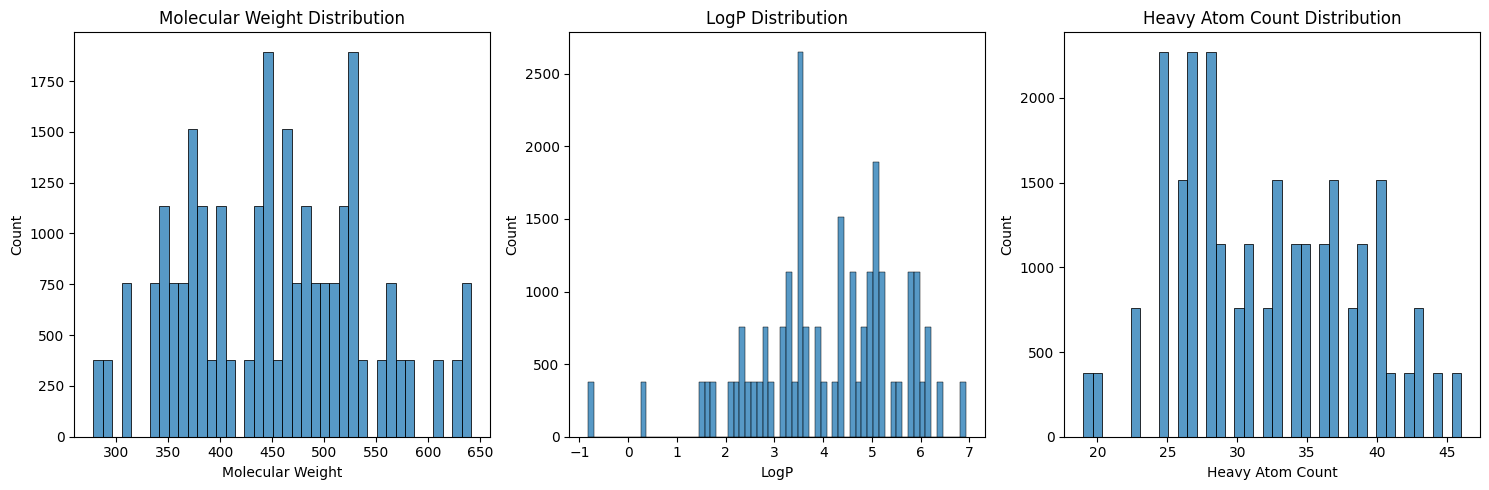


Target properties: DAVIS


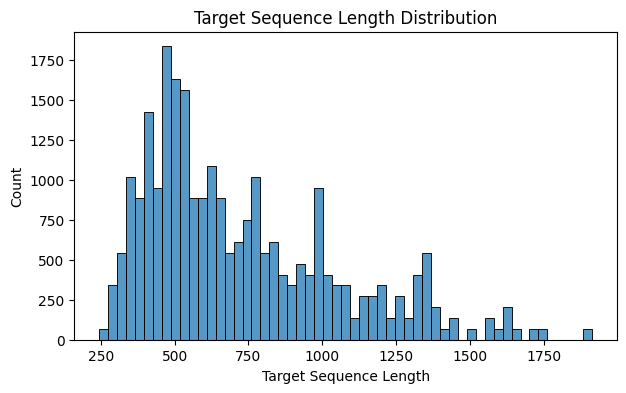


Binding affinity & transformations: DAVIS


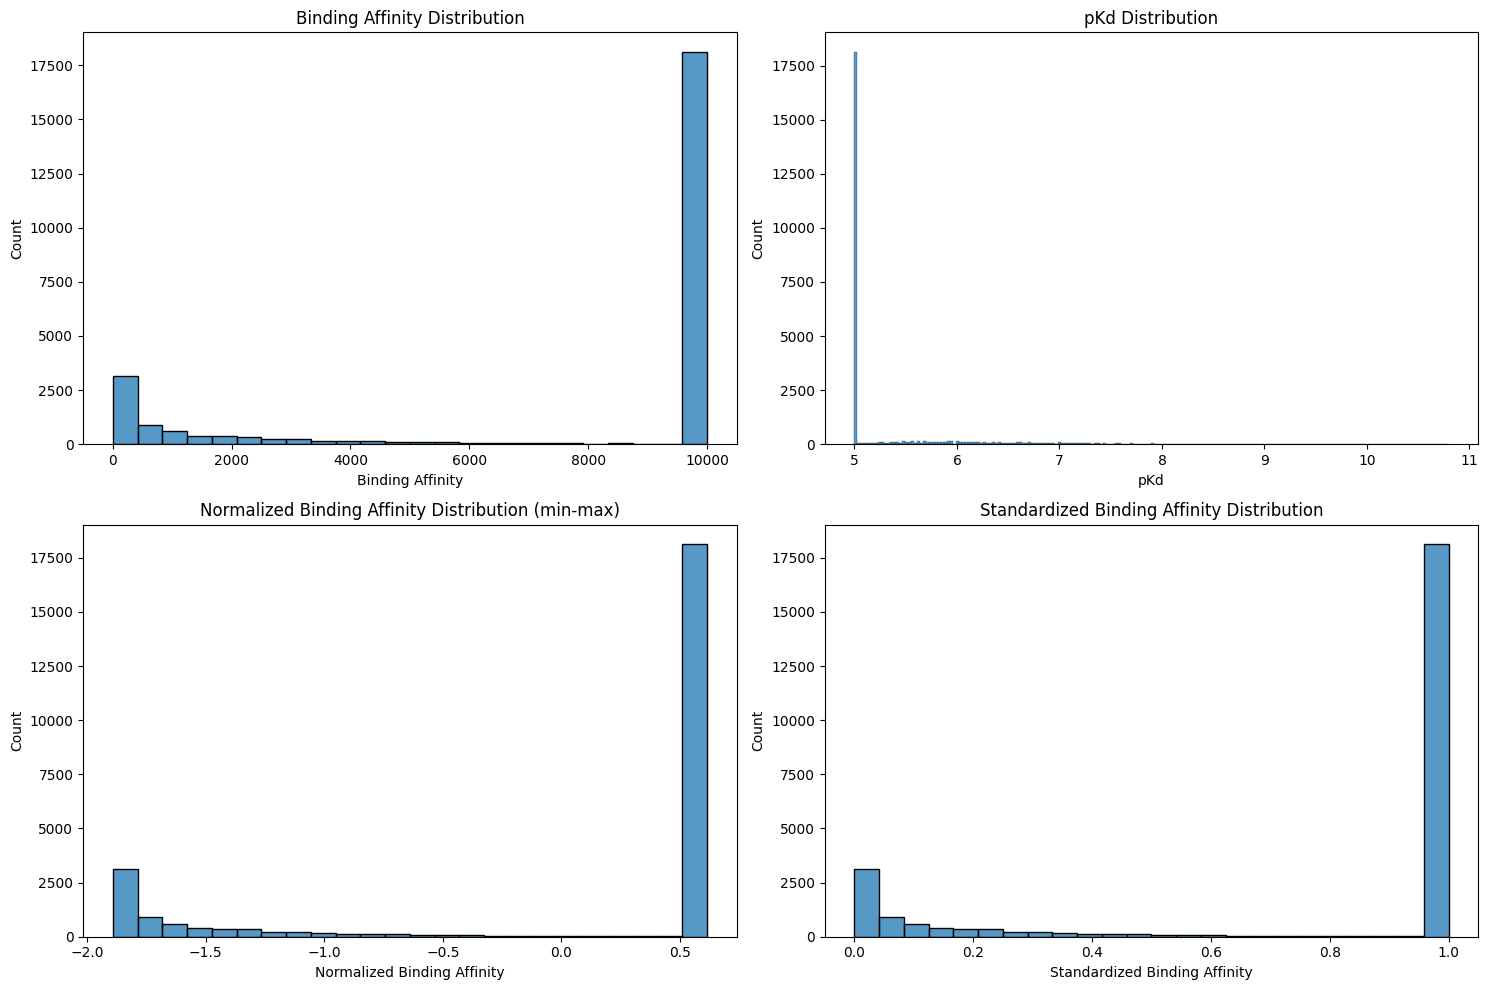

Unique drugs in DAVIS dataset: 68
Unique targets in DAVIS dataset: 374
<class 'pandas.core.frame.DataFrame'>
Index: 25432 entries, 0 to 25771
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Drug_ID       25432 non-null  int64  
 1   Drug          25432 non-null  object 
 2   Target_ID     25432 non-null  object 
 3   Target        25432 non-null  object 
 4   Y             25432 non-null  float64
 5   MW            25432 non-null  float64
 6   LogP          25432 non-null  float64
 7   HeavyAtoms    25432 non-null  int64  
 8   TargetLength  25432 non-null  int64  
 9   pKd           25432 non-null  float64
 10  normalized    25432 non-null  float64
 11  standardized  25432 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 2.5+ MB


In [94]:
df_davis = explore_dti_data('DAVIS')
print("Unique drugs in DAVIS dataset:", len(df_davis['Drug'].unique()))
print("Unique targets in DAVIS dataset:", len(df_davis['Target'].unique()))
df_davis.info()

Dataset shape: (117657, 5) KIBA

Drug properties: KIBA


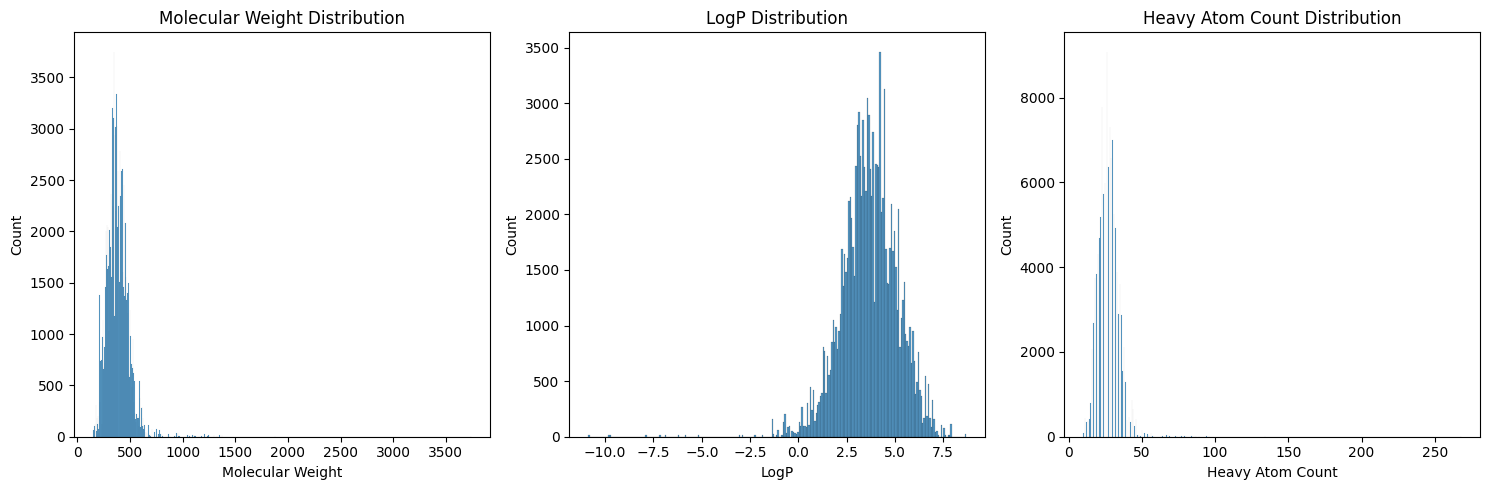


Target properties: KIBA


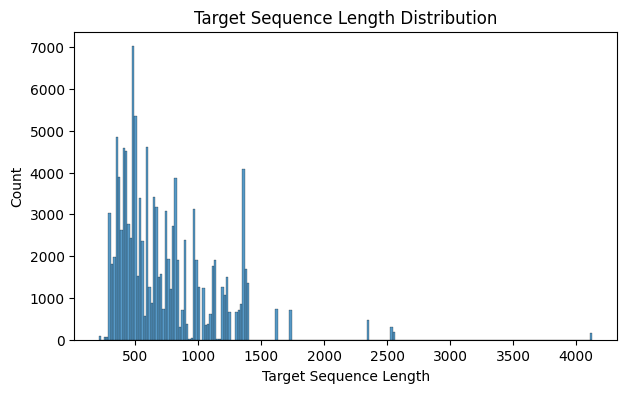


Binding affinity & transformations: KIBA


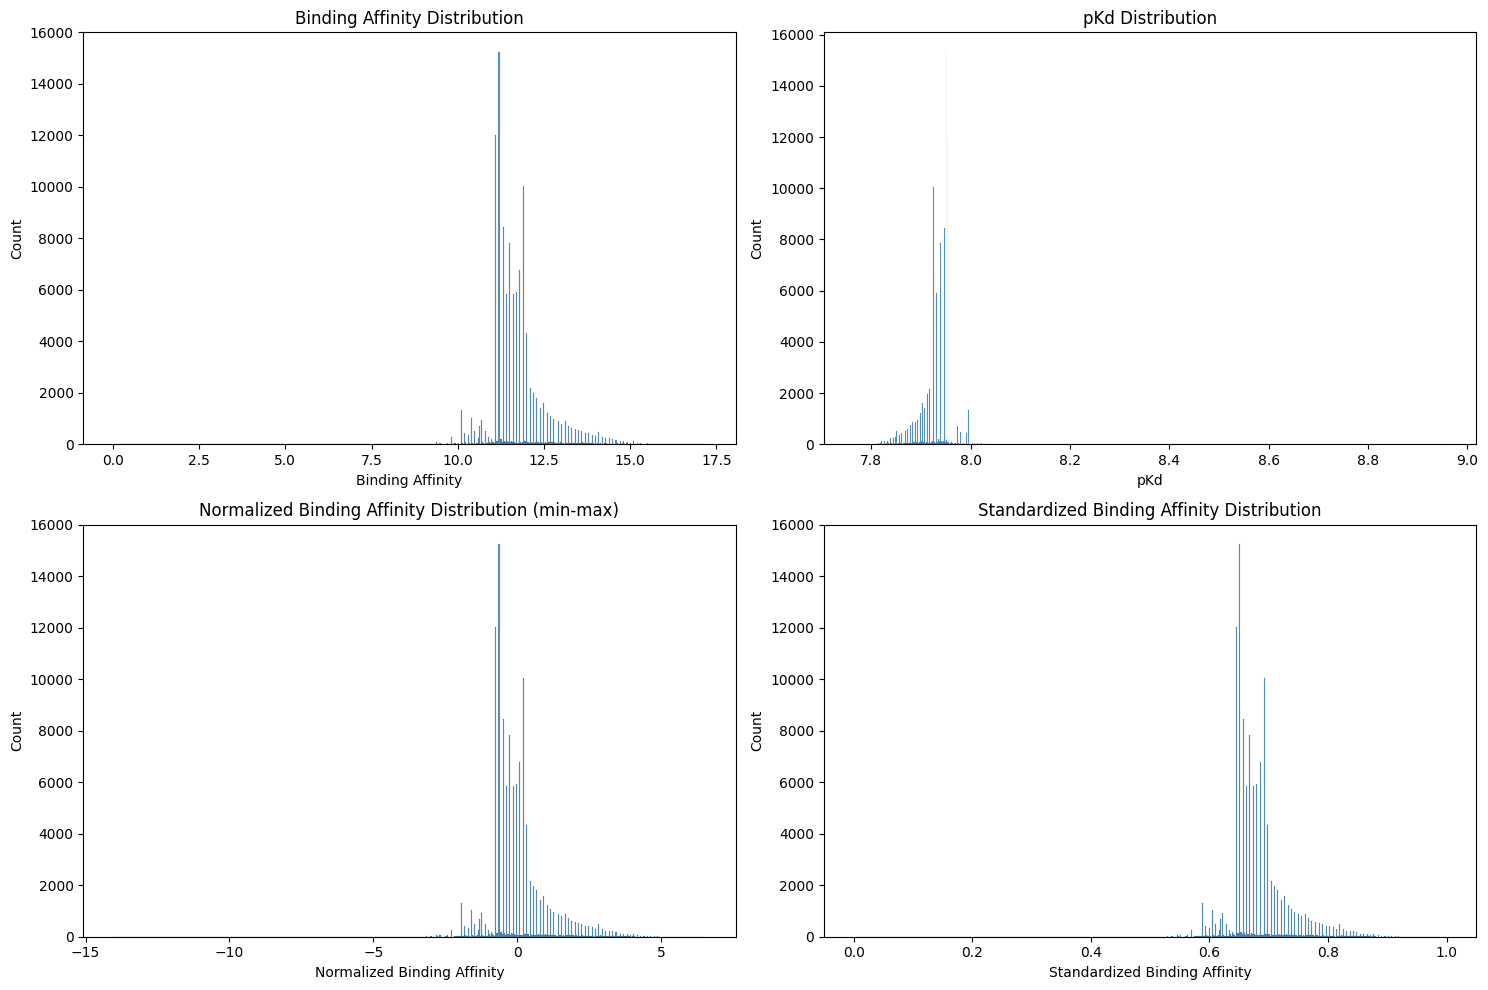

Unique drugs in KIBA dataset: 2068
Unique targets in KIBA dataset: 229
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117657 entries, 0 to 117656
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Drug_ID       117657 non-null  object 
 1   Drug          117657 non-null  object 
 2   Target_ID     117657 non-null  object 
 3   Target        117657 non-null  object 
 4   Y             117657 non-null  float64
 5   MW            117657 non-null  float64
 6   LogP          117657 non-null  float64
 7   HeavyAtoms    117657 non-null  int64  
 8   TargetLength  117657 non-null  int64  
 9   pKd           117657 non-null  float64
 10  normalized    117657 non-null  float64
 11  standardized  117657 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 10.8+ MB


In [92]:
explore_dti_data('KIBA')
print("Unique drugs in KIBA dataset:", len(df_kiba['Drug'].unique()))
print("Unique targets in KIBA dataset:", len(df_kiba['Target'].unique()))
df_kiba.info()

In [4]:
from torch_geometric.data import DataLoader
from sklearn.model_selection import train_test_split

BATCHE_SIZE = 16

# Split the dataset into train and validation sets
drugs_train, drugs_val = train_test_split(drugs_filtered, test_size=0.2, random_state=42)
proteins_train, proteins_val = train_test_split(proteins_filtered, test_size=0.2, random_state=42)

# Create DataLoader objects for train and validation sets
drugs_train_loader = DataLoader(drugs_train, batch_size=BATCHE_SIZE, shuffle=True)
drugs_val_loader = DataLoader(drugs_val, batch_size=BATCHE_SIZE, shuffle=False)
proteins_train_loader = DataLoader(proteins_train, batch_size=BATCHE_SIZE, shuffle=True)
proteins_val_loader = DataLoader(proteins_val, batch_size=BATCHE_SIZE, shuffle=False)

print("Number of batches & samples for drugs (train): ", len(drugs_train_loader), len(drugs_train_loader.dataset))
print("Number of batches & samples for drugs (val): ", len(drugs_val_loader), len(drugs_val_loader.dataset))
print("Number of batches & samples for proteins (train): ", len(proteins_train_loader), len(proteins_train_loader.dataset))
print("Number of batches & samples for proteins (val): ", len(proteins_val_loader), len(proteins_val_loader.dataset))
drug_lens = [(len(seq)) for seq in drugs_train_loader.dataset]
print("ID of min and max: ", np.argmin(drug_lens), np.argmax(drug_lens))

Number of batches & samples for drugs (train):  106 1684
Number of batches & samples for drugs (val):  27 422
Number of batches & samples for proteins (train):  22 342
Number of batches & samples for proteins (val):  6 86
ID of min and max:  665 1220


We encode molecules through one-hot-encoding of [RDKit](https://www.rdkit.org/docs/GettingStartedInPython.html) features


Example molecule 1220 :  O=C1OC2C3COC(=O)c4cc(O)c(O)c(O)c4-c4c(cc(O)c(O)c4O)C(=O)OC2C(OC(=O)c2cc(O)c(O)c4c2C2C1=CC(=O)C(O)(O)C2(O)O4)C(OC(=O)c1cc(O)c(O)c(O)c1)O3
Number of atoms:  68
Number of bonds:  76


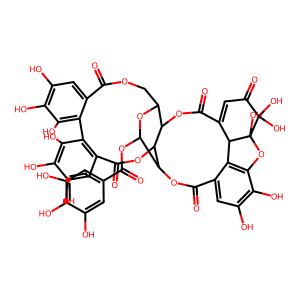

Converting SMILES to torch_geometric Data instance for:  O=C1OC2C3COC(=O)c4cc(O)c(O)c(O)c4-c4c(cc(O)c(O)c4O)C(=O)OC2C(OC(=O)c2cc(O)c(O)c4c2C2C1=CC(=O)C(O)(O)C2(O)O4)C(OC(=O)c1cc(O)c(O)c(O)c1)O3
Number of nodes:  68
Node features:  torch.Size([68, 9]) 
- example: tensor([8, 0, 1, 5, 0, 0, 3, 0, 0]) 
- out of classes:  [119, 9, 11, 12, 9, 5, 8, 2, 2]

Number of edges:  152
Edges have to be represented undirected as a COO tensor
Edge features:  torch.Size([152, 3]) 
- example: tensor([2, 0, 1]) 
- out of classes:  [22, 6, 2]


Data(x=[68, 9], edge_index=[2, 152], edge_attr=[152, 3], smiles='O=C1OC2C3COC(=O)c4cc(O)c(O)c(O)c4-c4c(cc(O)c(O)c4O)C(=O)OC2C(OC(=O)c2cc(O)c(O)c4c2C2C1=CC(=O)C(O)(O)C2(O)O4)C(OC(=O)c1cc(O)c(O)c(O)c1)O3')

In [5]:
from encoding import smiles2pydata

example_index = 1220
print("\nExample molecule", example_index, ': ', drugs_train[example_index])
example_drug = smiles2pydata(drugs_train[example_index], with_hydrogen=False, give_description=True)
for batch in drugs_train_loader:
    example_drug_batch = batch
    break
for batch in proteins_train_loader:
    example_protein_batch = batch
    break

num_node_features = example_drug.x.shape[1]
num_edge_features = example_drug.edge_attr.shape[1]
example_drug

---
---

# Encoding

## Encoding drug-molecules

Molecules in SMILES fromat are embedded through 3 views: MolGraph, Image, SMILES

See
 - https://github.com/BiomedSciAI/biomed-multi-view
 - https://huggingface.co/ibm/biomed.sm.mv-te-84m

In [6]:
from models import DrugBranch

model_drug = DrugBranch(
    embeddings_sizes = [512, 512, 768],
    hidden_dim = 512,
    latent_dim = 1024
)
z_drug, loss_recon, loss_kl = model_drug.forward(example_drug_batch, compute_loss=True)
print("Output: ", z_drug.shape)
print("Reconstruction loss : ", loss_recon)
print("KL divergence loss  : ", loss_kl)

2024-11-11 17:37:44,104 - root - INFO - pop-os:138043053084416:0:0 - BioMed Multi-view embedding model
2024-11-11 17:37:44,105 - root - INFO - pop-os:138043053084416:0:0 - dim_list [512, 512, 768] of Graph2dModel, ImageModel, TextModel
2024-11-11 17:37:44,116 - root - INFO - pop-os:138043053084416:0:0 - Loading checkpoint from provided path ../data_root/bmfm_model_dir/biomed-smmv-base.pth
2024-11-11 17:37:44,406 - root - INFO - pop-os:138043053084416:0:0 - Loading pretrain checkpoint for SmallMoleculeMultiView Model - _IncompatibleKeys(missing_keys=['aggregator.projections.0.weight', 'aggregator.projections.0.bias', 'aggregator.projections.1.weight', 'aggregator.projections.1.bias', 'aggregator.projections.2.weight', 'aggregator.projections.2.bias', 'aggregator.w_before_mean.0.weight', 'aggregator.w_before_mean.0.bias', 'aggregator.w_before_mean.2.weight', 'aggregator.down_project.weight', 'aggregator.down_project.bias', 'aggregator.shared_task_head.0.weight', 'aggregator.shared_task_h


Number of parameters per component
SMVV encoder       : 81,329,728
Branch up
- Encodings to Z   : 3,551,744
- Aggregator to Z* : 3,023,872
- Aggrigate to Z*  : 1,577,984
Branch down
- Z* to Aggrigate' : 1,052,160
- Expander to Z'   : 2,761,984
- Z' to Encodings' : 2,632,448

Output:  torch.Size([16, 1024])
Reconstruction loss :  tensor(1.3567, grad_fn=<AddBackward0>)
KL divergence loss  :  tensor(297.5254, grad_fn=<AddBackward0>)


In [9]:
from models import DrugBranch

model_drug = DrugBranch(
    embeddings_sizes = [512, 512, 768],
    hidden_dim = 512,
    latent_dim = 1024
)
z_drug, loss_recon, loss_kl = model_drug.forward(example_drug_batch, compute_loss=True)
print("Output: ", z_drug.shape)
print("Reconstruction loss : ", loss_recon)
print("KL divergence loss  : ", loss_kl)

2024-11-11 17:35:32,499 - root - INFO - pop-os:138430210330368:0:0 - BioMed Multi-view embedding model
2024-11-11 17:35:32,499 - root - INFO - pop-os:138430210330368:0:0 - dim_list [512, 512, 768] of Graph2dModel, ImageModel, TextModel
2024-11-11 17:35:32,508 - root - INFO - pop-os:138430210330368:0:0 - Loading checkpoint from provided path ../data_root/bmfm_model_dir/biomed-smmv-base.pth
2024-11-11 17:35:32,585 - root - INFO - pop-os:138430210330368:0:0 - Loading pretrain checkpoint for SmallMoleculeMultiView Model - _IncompatibleKeys(missing_keys=['aggregator.projections.0.weight', 'aggregator.projections.0.bias', 'aggregator.projections.1.weight', 'aggregator.projections.1.bias', 'aggregator.projections.2.weight', 'aggregator.projections.2.bias', 'aggregator.w_before_mean.0.weight', 'aggregator.w_before_mean.0.bias', 'aggregator.w_before_mean.2.weight', 'aggregator.down_project.weight', 'aggregator.down_project.bias', 'aggregator.shared_task_head.0.weight', 'aggregator.shared_task_h


Number of parameters per component
SMVV encoder       : 81,329,728
Branch up
- Encodings to Z   : 4,470,784
- Aggregator to Z* : 3,023,872
- Aggrigate to Z*  : 1,577,984
Branch down
- Z* to Aggrigate' : 1,052,160
- Expander to Z'   : 2,761,984
- Z' to Encodings' : 3,354,880

Output:  torch.Size([16, 1024])
Reconstruction loss :  tensor(1.3704, grad_fn=<AddBackward0>)
KL divergence loss  :  tensor(304.4420, grad_fn=<AddBackward0>)


## Encoding target-proteins

Proteins in amino-acid sequence format are embedded through 1 view: amino-acid sequence

See
 - https://github.com/mheinzinger/ProstT5
 - https://huggingface.co/Rostlab/ProstT5

In [7]:
from models import TargetBranch

model_target = TargetBranch(
    input_dim = 1024,
    hidden_dim = 512,
    latent_dim = 1024
)
z_target, loss_recon, loss_kl = model_target.forward(example_protein_batch, compute_loss=True)
print("Output: ", z_drug.shape)
print("Reconstruction loss : ", loss_recon)
print("KL divergence loss  : ", loss_kl)

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565



Number of parameters per component
Protein encoder: 1,208,164,352
Branch up
- Encodings to Z: 2,103,808
Branch down
- Z to Encodings: 1,051,136

Output:  torch.Size([16, 1024])
Reconstruction loss :  tensor(0.1440, grad_fn=<MseLossBackward0>)
KL divergence loss  :  tensor(110.4774, grad_fn=<MeanBackward0>)
